# Rekomendasi Produk Berdasarkan Perilaku Customer


## Import Dataset
Mengimport dataset yang sudah didownload dalam bentuk csv menggunakan library pandas dari python. Lalu memahami dataset yang dipunya dengan melihat isi dan strukturnya.

In [22]:
import pandas as pd

# Import dataset
df_raw = pd.read_csv("Super_Store_data.csv", encoding='latin1')
# Melihat informasi dataset
print(df_raw.info())
print("\nJumlah Baris dan Kolom:", df_raw.shape)
print("\nLima Data Teratas:\n", df_raw.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

## Data Preparation
Membersihkan data dengan menghapus fitur yang tidak terpakai supaya data siap untuk dianalisis

In [23]:
# Membuat salinan DataFrame 
df_cleaned = df_raw.copy()
# Menghapus kolom yang tidak diperlukan
df_cleaned = df_cleaned.drop(columns=['Row ID', 'Order ID', 'Ship Date', 'Customer ID', 'Country', 'Postal Code', 'Region', 'Product ID', 'Category', 'Discount'])
print("\nDataFrame Setelah Pembersihan:\n", df_cleaned.head())


DataFrame Setelah Pembersihan:
    Order Date       Ship Mode    Customer Name   Segment             City  \
0   11/8/2016    Second Class      Claire Gute  Consumer        Henderson   
1   11/8/2016    Second Class      Claire Gute  Consumer        Henderson   
2  10/11/2015  Standard Class   Sean O'Donnell  Consumer  Fort Lauderdale   
3    6/9/2014  Standard Class  Brosina Hoffman  Consumer      Los Angeles   
4    6/9/2014  Standard Class  Brosina Hoffman  Consumer      Los Angeles   

        State Sub-Category  \
0    Kentucky    Bookcases   
1    Kentucky       Chairs   
2     Florida       Tables   
3  California  Furnishings   
4  California       Tables   

                                                       Product Name  \
0                                 Bush Somerset Collection Bookcase   
1       Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back   
2                     Bretford CR4500 Series Slim Rectangular Table   
3  Eldon Expressions Wood and Plastic D

In [24]:
# Pengecekan Missing Value dan Nilai 0
cek_missing = df_cleaned.isna().sum()
cek_0 = df_cleaned.isin([0]).sum()
print("\nJumlah Nilai Missing Setiap Kolom:\n", cek_missing)
print("\nJumlah Nilai 0 Setiap Kolom:\n", cek_0)



Jumlah Nilai Missing Setiap Kolom:
 Order Date       0
Ship Mode        0
Customer Name    0
Segment          0
City             0
State            0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Profit           0
dtype: int64

Jumlah Nilai 0 Setiap Kolom:
 Order Date        0
Ship Mode         0
Customer Name     0
Segment           0
City              0
State             0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Profit           33
dtype: int64


## Visualisasi Data
Membuat visualisasi data untuk mendapatkan insight/informasi yang dapat berguna dalam proyek
1. Histogram Persebaran Order Date
2. Histogram Persebaran Ship Mode
3. Persebaran Segment & Nama Customer Terbanyak Tiap Segment
4. Histogram Persebaran State
5. 10 Produk Terlaku Berdasarkan Quantity
6. 10 Nama Produk Penghasil Profit Tertinggi
7. Penjualan Sub-Category Berdasarkan Quantity
8. Persebaran Sub-Category Berdasarkan Segment Customer

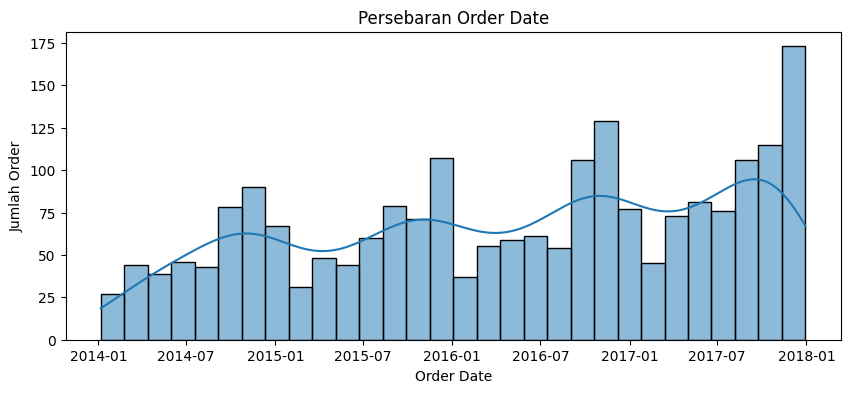

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Persebaran Order Date
plt.figure(figsize=(10,4))
df_cleaned['Order Date'] = pd.to_datetime(df_cleaned['Order Date'])
sns.histplot(df_cleaned['Order Date'], bins=30, kde=True)
plt.title('Persebaran Order Date')
plt.xlabel('Order Date')
plt.ylabel('Jumlah Order')
plt.show()

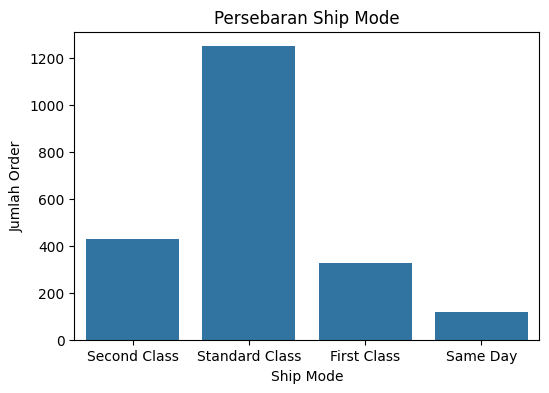

In [26]:
# 2. Persebaran Ship Mode
plt.figure(figsize=(6,4))
sns.countplot(x='Ship Mode', data=df_cleaned)
plt.title('Persebaran Ship Mode')
plt.xlabel('Ship Mode')
plt.ylabel('Jumlah Order')
plt.show()

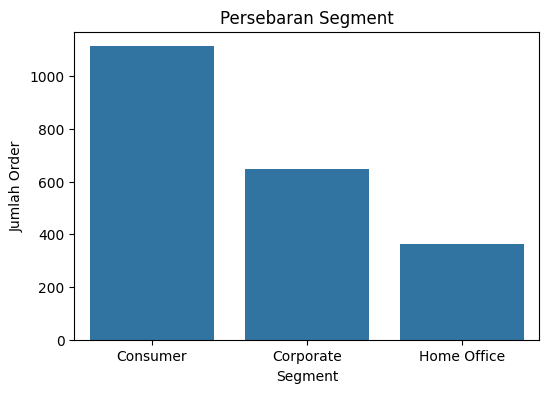

Customer terbanyak di segment Consumer: Seth Vernon
Customer terbanyak di segment Corporate: Kelly Lampkin
Customer terbanyak di segment Home Office: Mike Pelletier
Customer terbanyak di seluruh data: Seth Vernon


In [41]:
# 3. Persebaran Segment & Nama Customer Terbanyak Tiap Segment
plt.figure(figsize=(6,4))
sns.countplot(x='Segment', data=df_cleaned)
plt.title('Persebaran Segment')
plt.xlabel('Segment')
plt.ylabel('Jumlah Order')
plt.show()

# Nama customer terbanyak tiap segment
top_customers = df_cleaned.groupby(['Segment', 'Customer Name']).size().reset_index(name='Jumlah')
top_customers = top_customers.sort_values(['Segment','Jumlah'], ascending=[True,False])
for seg in top_customers['Segment'].unique():
    nama = top_customers[top_customers['Segment']==seg].iloc[0]['Customer Name']
    print(f"Customer terbanyak di segment {seg}: {nama}")

# Nama customer terbanyak di seluruh data
nama_customer_terbanyak = df_cleaned['Customer Name'].value_counts().idxmax()
print(f"Customer terbanyak di seluruh data: {nama_customer_terbanyak}")

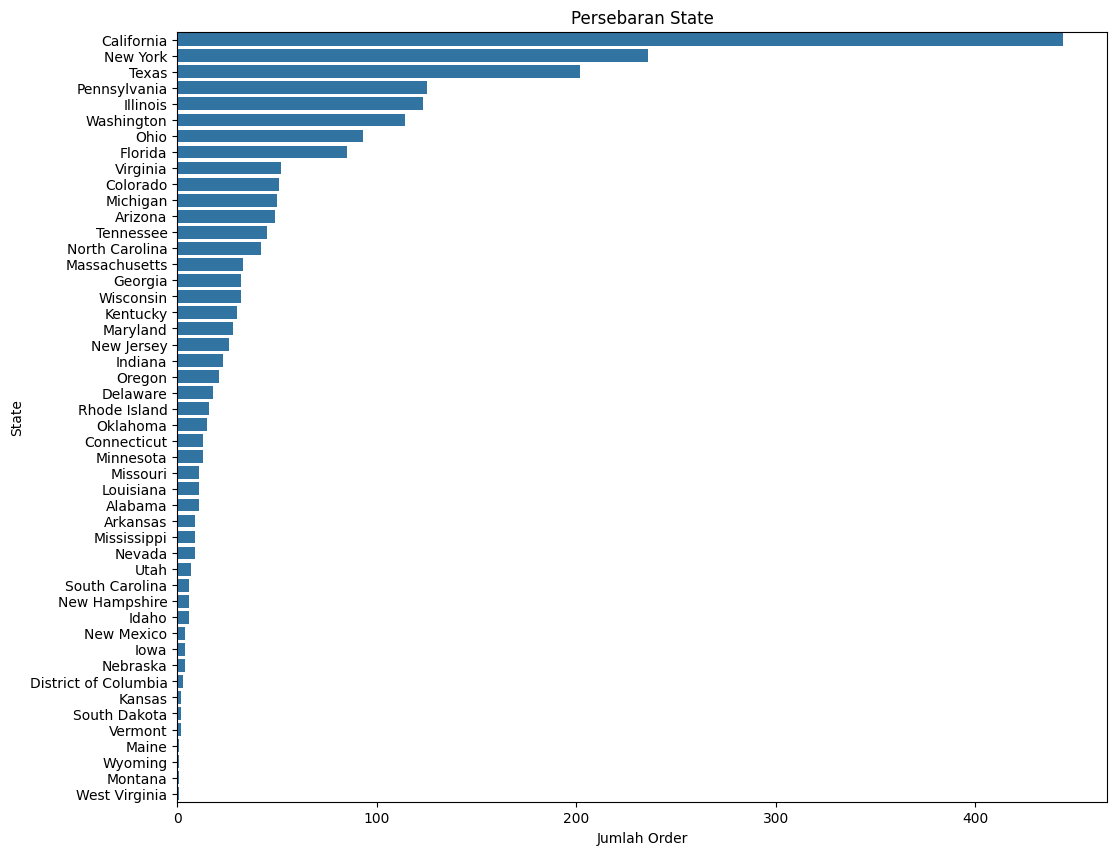

In [28]:
# 4. Persebaran State
plt.figure(figsize=(12,10))
sns.countplot(y='State', data=df_cleaned, order=df_cleaned['State'].value_counts().index)
plt.title('Persebaran State')
plt.xlabel('Jumlah Order')
plt.ylabel('State')
plt.show()

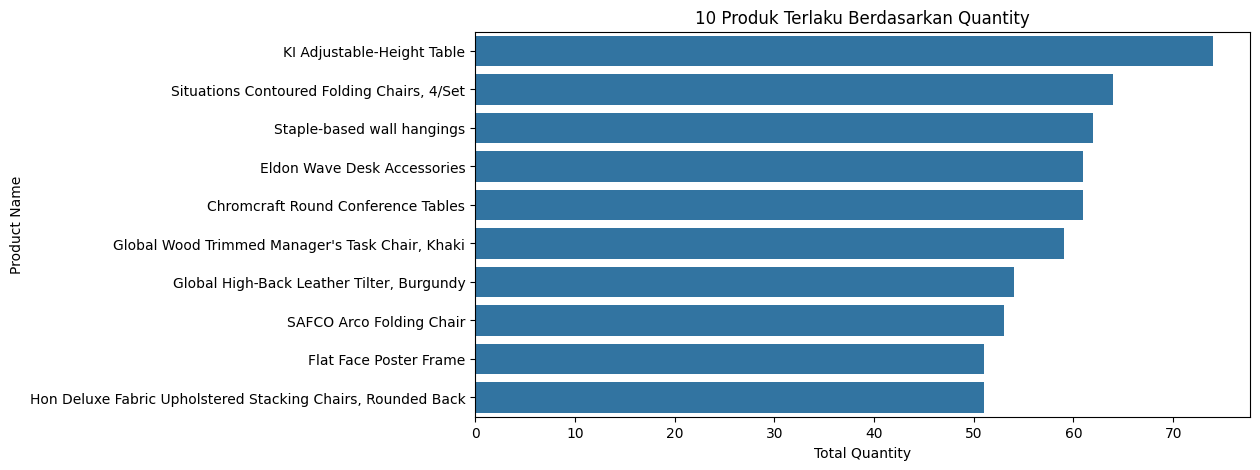

In [29]:
# 5. 10 Produk Terlaku Berdasarkan Quantity
top_products_qty = df_cleaned.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products_qty.values, y=top_products_qty.index)
plt.title('10 Produk Terlaku Berdasarkan Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Product Name')
plt.show()

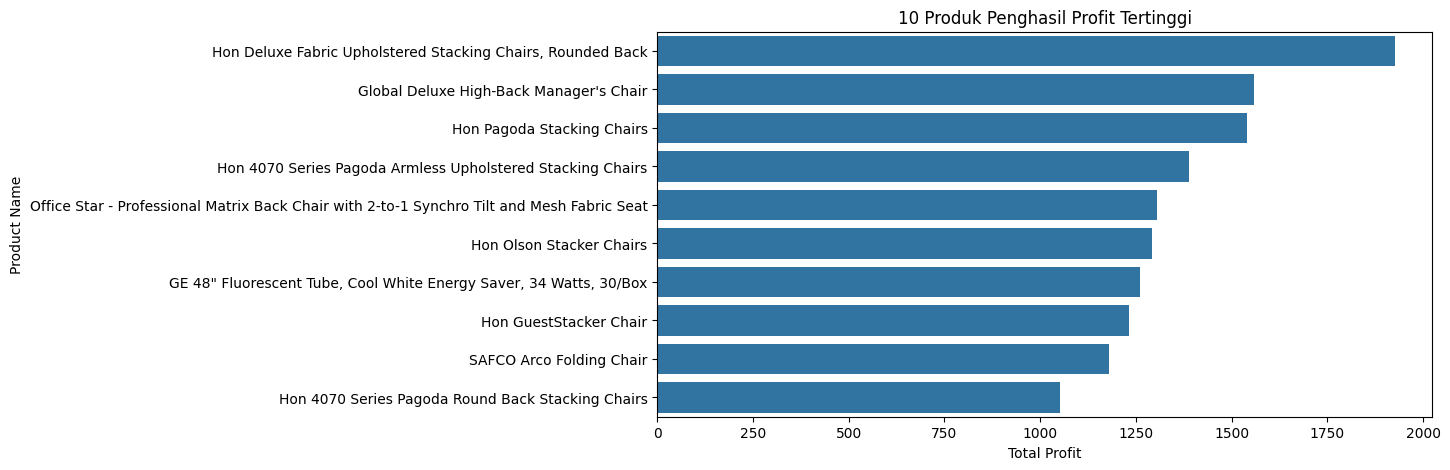

In [30]:
# 6. 10 Nama Produk Penghasil Profit Tertinggi
top_products_profit = df_cleaned.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products_profit.values, y=top_products_profit.index)
plt.title('10 Produk Penghasil Profit Tertinggi')
plt.xlabel('Total Profit')
plt.ylabel('Product Name')
plt.show()

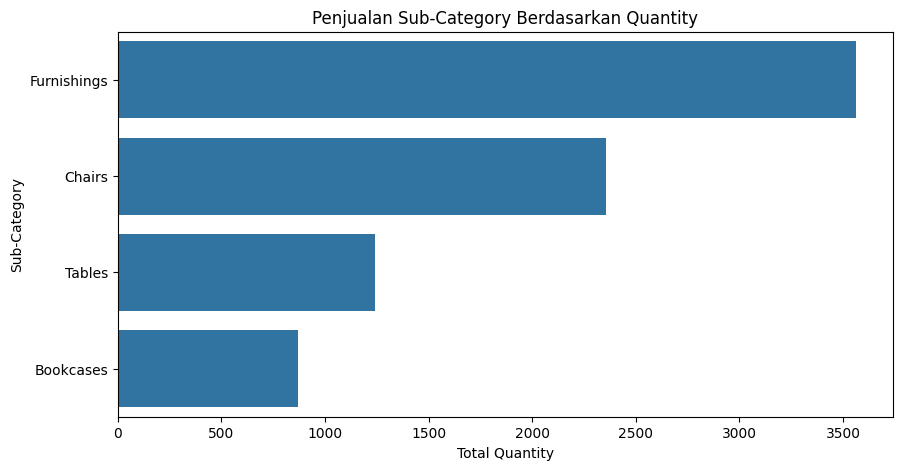

In [31]:
# 7. Penjualan Sub-Category Berdasarkan Quantity
subcat_qty = df_cleaned.groupby('Sub-Category')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=subcat_qty.values, y=subcat_qty.index)
plt.title('Penjualan Sub-Category Berdasarkan Quantity')
plt.xlabel('Total Quantity')
plt.ylabel('Sub-Category')
plt.show()


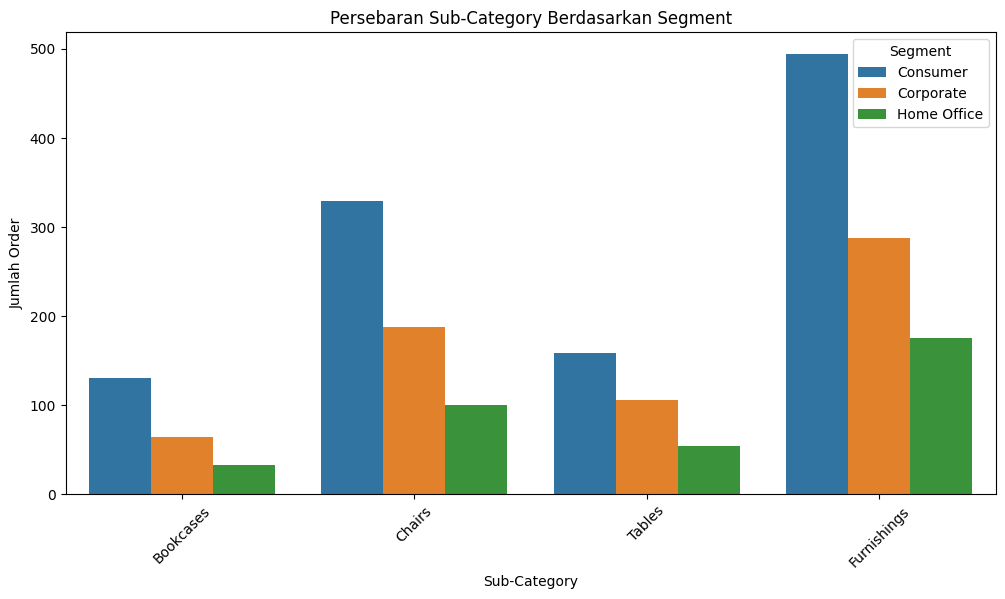

In [32]:
# 8. Persebaran Sub-Category Berdasarkan Segment
plt.figure(figsize=(12,6))
sns.countplot(x='Sub-Category', hue='Segment', data=df_cleaned)
plt.title('Persebaran Sub-Category Berdasarkan Segment')
plt.xlabel('Sub-Category')
plt.ylabel('Jumlah Order')
plt.xticks(rotation=45)
plt.legend(title='Segment')
plt.show()

## Data Preprocessing
Memberihkan data sebelum dihitung dengan algoritma. Menghapus kolom yang tidak diperlukan

In [33]:
# Membuat DataFrame untuk Cosine Similarity
df_cosine = df_raw.copy()
df_cosine = df_cosine[['Customer ID', 'Product ID', 'Product Name', 'Quantity']]
print(df_cosine.head())

  Customer ID       Product ID  \
0    CG-12520  FUR-BO-10001798   
1    CG-12520  FUR-CH-10000454   
2    SO-20335  FUR-TA-10000577   
3    BH-11710  FUR-FU-10001487   
4    BH-11710  FUR-TA-10001539   

                                                       Product Name  Quantity  
0                                 Bush Somerset Collection Bookcase         2  
1       Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back         3  
2                     Bretford CR4500 Series Slim Rectangular Table         5  
3  Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood         7  
4                          Chromcraft Rectangular Conference Tables         9  


## Modelling dan Evaluasi
Mencari nilai kemiripan antar produk berdasarkan perilaku customer melalui Algoritma Cosine Similarity


Top 5 Product Pairs dengan Similarity Tertinggi :

Product ID       Product ID     
FUR-BO-10003433  FUR-BO-10001918    0.789542
FUR-BO-10003660  FUR-BO-10001601    0.777778
FUR-FU-10001379  FUR-CH-10001545    0.761750
FUR-FU-10001215  FUR-CH-10002758    0.757383
FUR-FU-10002505  FUR-BO-10002598    0.746552
dtype: float64


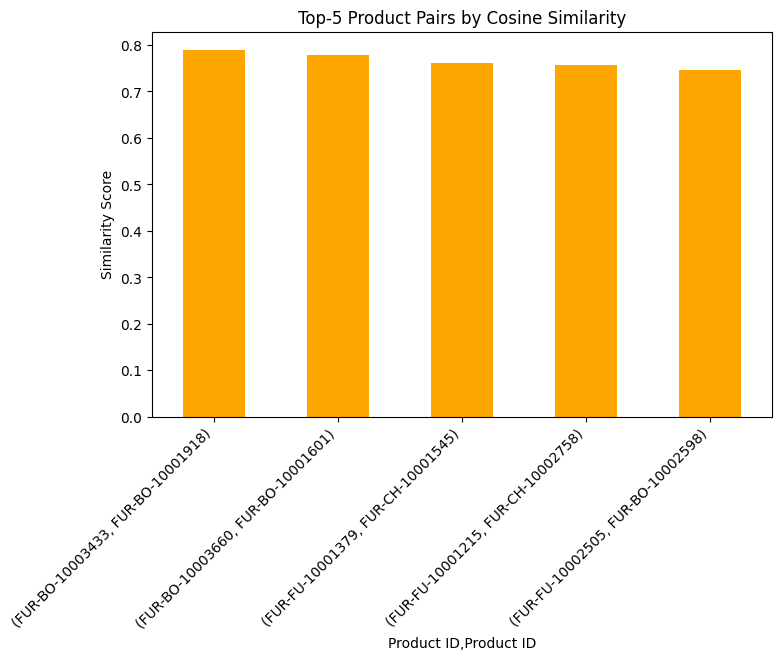

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Buat pivot table (User-Item Matrix)
# Rows = Customer, Columns = Product, Values = Quantity
user_item_matrix = df_cosine.pivot_table(index='Customer ID',
                                  columns='Product ID',
                                  values='Quantity',
                                  aggfunc='sum',
                                  fill_value=0)

# Hitung Cosine Similarity antar produk
# Transpose: agar similarity dihitung antar kolom (produk)
product_similarity = cosine_similarity(user_item_matrix.T)

# Buat DataFrame similarity
product_similarity_df = pd.DataFrame(product_similarity,
                                     index=user_item_matrix.columns,
                                     columns=user_item_matrix.columns)

mask = np.tril(np.ones(product_similarity_df.shape), k=0).astype(bool)
similarity_unstacked = product_similarity_df.mask(mask).unstack().dropna()

# Urutkan berdasarkan similarity tertinggi
top5_similar = similarity_unstacked.sort_values(ascending=False).head(5)

print("\nTop 5 Product Pairs dengan Similarity Tertinggi :\n")
print(top5_similar)

# Visualisasi Top-5 Similar Products
plt.figure(figsize=(8, 5))
top5_similar.plot(kind='bar', color='orange')
plt.title("Top-5 Product Pairs by Cosine Similarity")
plt.ylabel("Similarity Score")
plt.xticks(rotation=45, ha="right")
plt.show()

In [35]:
# Fungsi rekomendasi produk
def recommend_products(product_id, top_n=5):
    if product_id not in product_similarity_df.index:
        return f"Produk {product_id} tidak ditemukan!"
    
    # Ambil skor similarity ke semua produk lain
    sim_scores = product_similarity_df[product_id].sort_values(ascending=False)
    
    # Buang dirinya sendiri dan ambil top_n
    top_similar = sim_scores.drop(product_id).head(top_n)
    
    # Join dengan nama produk agar lebih informatif
    rekomendasi = pd.merge(
        top_similar.reset_index(),
        df_cosine[['Product ID', 'Product Name']].drop_duplicates(),
        on='Product ID',
        how='left'
    )
    rekomendasi.columns = ['Product ID', 'Similarity Score', 'Product Name']
    return rekomendasi

# Coba rekomendasi produk
sample_product = df_cosine['Product ID'].iloc[0]  # ambil 1 produk random
sample_product_name = df_cosine[df_cosine['Product ID'] == sample_product]['Product Name'].iloc[0]

pd.set_option('display.max_colwidth', None)  # Tampilkan seluruh isi kolom
pd.set_option('display.width', 0)            
print(f"\nRekomendasi untuk produk: {sample_product} - {sample_product_name}\n")
print(recommend_products(sample_product, top_n=5))

# Evaluasi
# Precision@K: apakah rekomendasi mengandung produk yang benar-benar dibeli oleh user
# Coverage: seberapa banyak produk yang punya rekomendasi
coverage = product_similarity_df.shape[0] / df_cosine['Product ID'].nunique()
print(f"\nCoverage: {coverage:.2%}")


Rekomendasi untuk produk: FUR-BO-10001798 - Bush Somerset Collection Bookcase

        Product ID  Similarity Score  \
0  FUR-BO-10003159          0.499350   
1  FUR-BO-10003450          0.376685   
2  FUR-FU-10004622          0.375470   
3  FUR-TA-10001039          0.319905   
4  FUR-BO-10000330          0.308607   

                                                       Product Name  
0  Sauder Camden County Collection Libraries, Planked Cherry Finish  
1           Bush Westfield Collection Bookcases, Dark Cherry Finish  
2          Eldon Advantage Foldable Chair Mats for Low Pile Carpets  
3                                        KI Adjustable-Height Table  
4    Sauder Camden County Barrister Bookcase, Planked Cherry Finish  

Coverage: 100.00%
